# Problem statement
- Given the haberman dataset, we need to perform various EDA techniques and to come up with insights(observations) from that data. 

#                               Exploratory Data Analysis techniques

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('haberman.csv',names=['age','year_of_operation','no_of_positive_node','survival_status'],skiprows=[0])
df.head()

,age,year_of_operation,no_of_positive_node,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [175]:
print(df.shape)       #no of data points and feature in the data set

(306, 4)


In [176]:
print(df.columns)     # names of the features

Index(['age', 'year_of_operation', 'no_of_positive_node', 'survival_status'], dtype='object')


In [177]:
df['survival_status'].value_counts()    #number of classes and data points per class

1    225
2     81
Name: survival_status, dtype: int64

### OBSERVATION
- This data set has **306 data points** and **4 no of features**. 


- Names of those features are  **'age', 'year_of_operation', 'no_of_positive_node'** and **'survival_status'**.  


- It has **two classes** in survial_status feature.  

>- class '1' in survival_status has 225 data points.

>- class '2' in survival_status has 81 data points.

From the above result, the number of data points of two classes is not equal. So, we can conclude that the Haberman dataset is **unbalanced** dataset.

### OBJECTIVE


 To find a **critical** features in the Haberman dataset. So that, We can find the breast cancer earlier by doing diagnosis based on that features's properties and ways to **imporve the life span** of humans species.

# 1D SCATTER PLOT

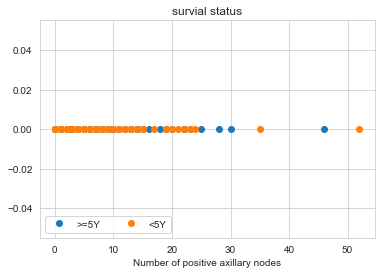

In [178]:
#1D SCATTER PLOT
s1=df.loc[df['survival_status']==1]
s2=df.loc[df['survival_status']==2]
plt.plot(s1['no_of_positive_node'],np.zeros_like(s1['no_of_positive_node']),'o')
plt.plot(s2['no_of_positive_node'],np.zeros_like(s2['no_of_positive_node']),'o')
plt.title('survial status')
plt.xlabel("Number of positive axillary nodes")
plt.legend(('>=5Y','<5Y'),scatterpoints=1,loc='lower left',ncol=5,fontsize=10,)
plt.show()
         
         
        

### OBSERVATION
- It does not shows the density/frequency of points.
- So let's draw Histogram of various features.

# HISTOGRAM

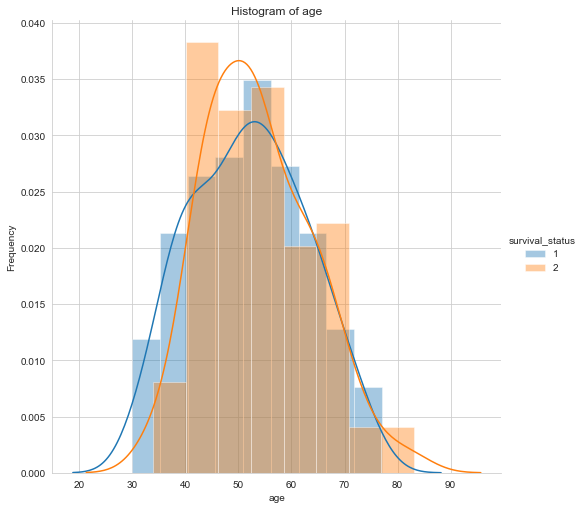

In [179]:
#HISTOGRAM OF AGE
sns.FacetGrid(df,hue='survival_status',height=7).map(sns.distplot,'age').add_legend()
plt.title('Histogram of age')
plt.ylabel('Frequency')
plt.show()


### OBSERVATION
- The **overlap** between two classes are too high.

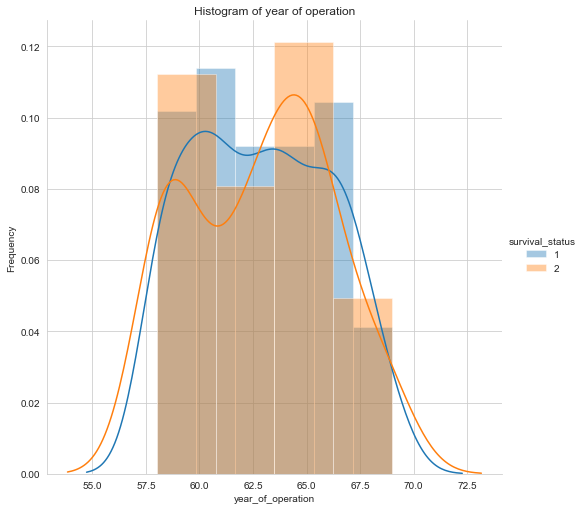

In [180]:
#HISTOGRAM OF YEAR OF OPERATION
sns.FacetGrid(df,hue='survival_status',height=7).map(sns.distplot,'year_of_operation').add_legend()
plt.title('Histogram of year of operation')
plt.ylabel('Frequency')
plt.show()

### OBSERVATION
- The **overlap** between two classes are too high.

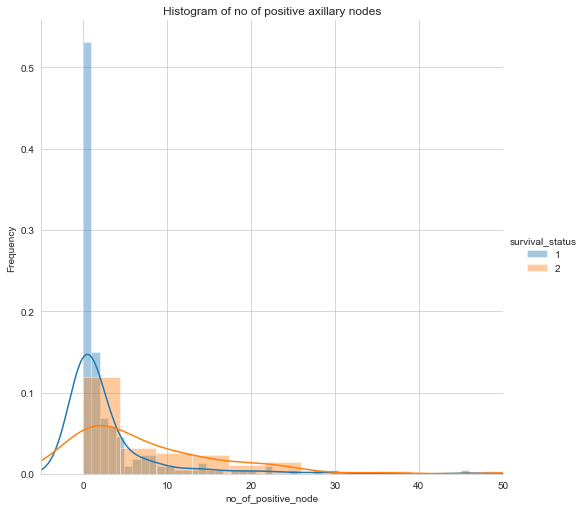

In [181]:
#HISTOGRAM OF NUMBER OF POSITIVE AXILLARY NODES
sns.FacetGrid(df,hue='survival_status',height=7).map(sns.distplot,'no_of_positive_node').add_legend()
plt.title('Histogram of no of positive axillary nodes')
plt.ylabel('Frequency')
plt.xlim(-5, 50)
plt.show()

### OBSERVATION
- From the above three histograms, the histogram, which has **number of postive axillary node**, give better differentiation of two survival_status classes compared to remaining two histograms.
- So, we can able to consider no of postive axillary node as the **most useful feature** compared to remaining features.
- But we have to note that the two survival status classes **can not be fully linearly seperated** by any one of the three features.


# BOX PLOT

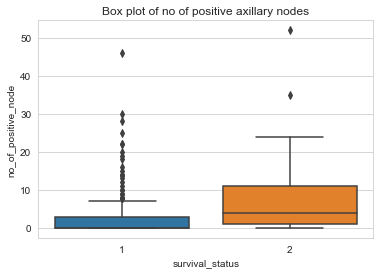

In [194]:
#BOX PLOT
sns.boxplot(x='survival_status', y='no_of_positive_node',data=df)
plt.title('Box plot of no of positive axillary nodes')
#plt.ylim(-5, 20)
plt.show()

 ### OBSERVATION
 - The **inter quantile range**, which is measuring the **50%** of the total values, lies below where **the number of positive node is 4** for survival status **class 1** but some overlap with another class.
 - Whereas for the survival status **class 2**, the IQR is lies between **positive nodes 1 and 11** but some overlap with another class.

# VIOLIN PLOT

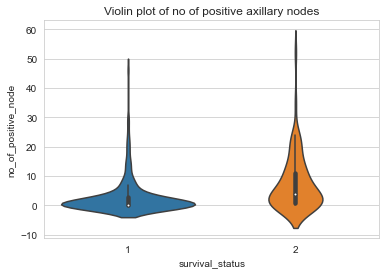

In [193]:
#VIOLIN PLOT
sns.violinplot(x='survival_status', y='no_of_positive_node',data=df,size=8)
plt.title('Violin plot of no of positive axillary nodes')
#plt.ylim(0,15)
plt.show()

### OBSERVATION
- The survival status class 1 has very **narrow PDF curve**,which means **denser points**, at the stating point of number of positive node's scale.

# 2D SCATTER PLOT

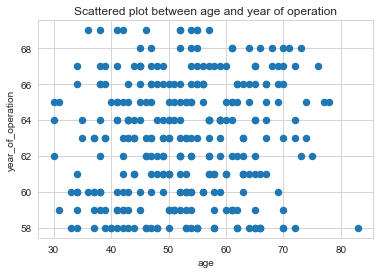

In [184]:
#2D SCATTER PLOT
df.plot(kind='scatter',x='age',y='year_of_operation', linewidth=3)
plt.title('Scattered plot between age and year of operation')
plt.show()

### OBSERVATION
- We can not distinguish the two survival status classes due to **unicolor** code.
- So let's plot scatter plot with multicolor.

# 2D SCATTER PLOT TO DIFFERENCIATE CLASSES WITH COLORS

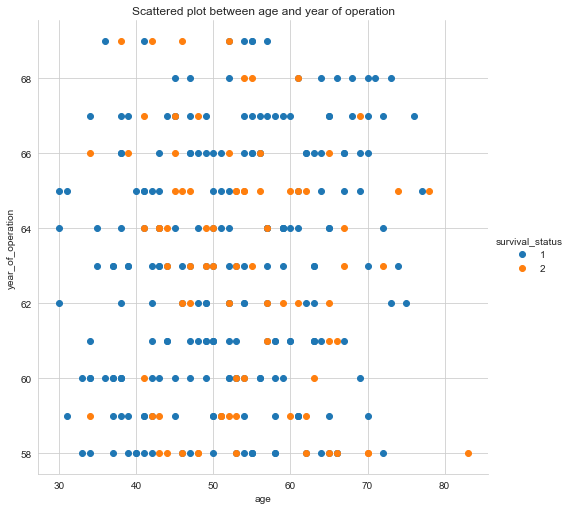

In [185]:
#2D SCATTER PLOT BETWEEN AGE AND YEAR OF OPERATION
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='survival_status', height=7).map(plt.scatter,'age','year_of_operation').add_legend()
plt.title('Scattered plot between age and year of operation')
plt.show()

### OBSERVATION
- The two classes are very randomly scattered in the graph.
- So, we **cannot linearly separate** two classes with **age and year of operation** as features. 
- We will try ploting graph with different features.

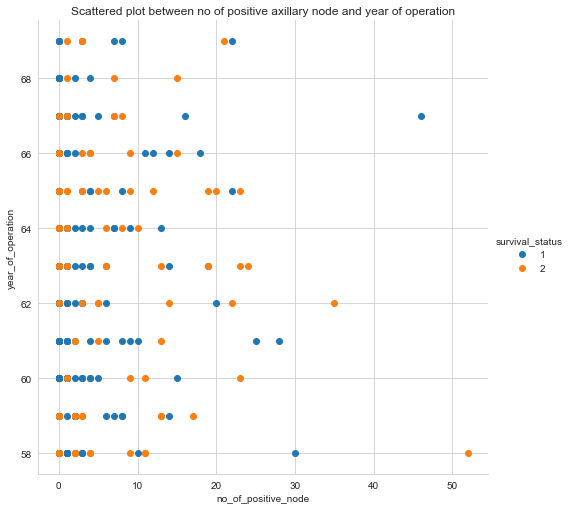

In [186]:
#2D SCATTER PLOT BETWEEN NUMBER OF POSITIVE AXILLARY NODES AND YEAR OF OPERATION
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='survival_status', height=7).map(plt.scatter,'no_of_positive_node','year_of_operation').add_legend()
plt.title('Scattered plot between no of positive axillary node and year of operation')
plt.show()

### OBSERVATION
- The two classes are very randomly scattered in the graph.
- So, we **cannot linearly separate** two classes with **no of positive nodes and year of operation** as features. 
- we will try ploting graph with different features.

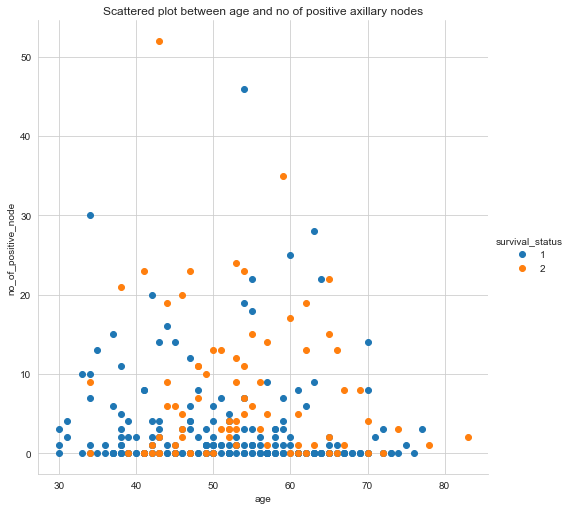

In [187]:
#2D SCATTER PLOT BETWEEN AGE AND NUMBER OF POSITIVE AXILLARY NODES
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='survival_status', height=7).map(plt.scatter,'age','no_of_positive_node').add_legend()
plt.title('Scattered plot between age and no of positive axillary nodes')
#plt.ylim(-1,50)
plt.show()

### OBSERVATION
- The two calsses are randomly scattered in this graph too.
- But we can able to **somewhat linearly seperate few poins** in this two classes  using **lines and if...else condition**. 
- we will try ploting this graph with *different Y scale* values for better view of points.

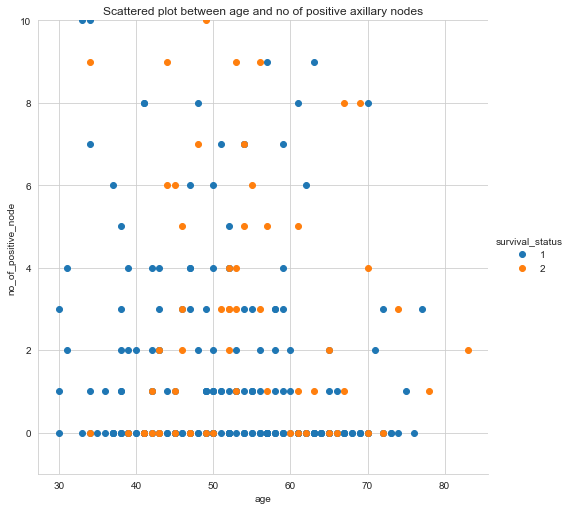

In [188]:
#2D SCATTER PLOT BETWEEN AGE AND NUMBER OF POSITIVE AXILLARY NODES
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='survival_status', height=7).map(plt.scatter,'age','no_of_positive_node').add_legend()
plt.title('Scattered plot between age and no of positive axillary nodes')
plt.ylim(-1,10)
plt.show()

### OBSERVATION
- From this graph, we can see that **before 40 years of age**, the points having survival status equal or higher than 5 years(survival status=1) are more.
- And also when **the number of positive nodes are less than 4**, then the points having survival status equal or higher than 5 years(survival status=1) are **highly dense**.
- So, let's go to **PDF and CDF** graph to get probability for those two classes.

# PAIR PLOT

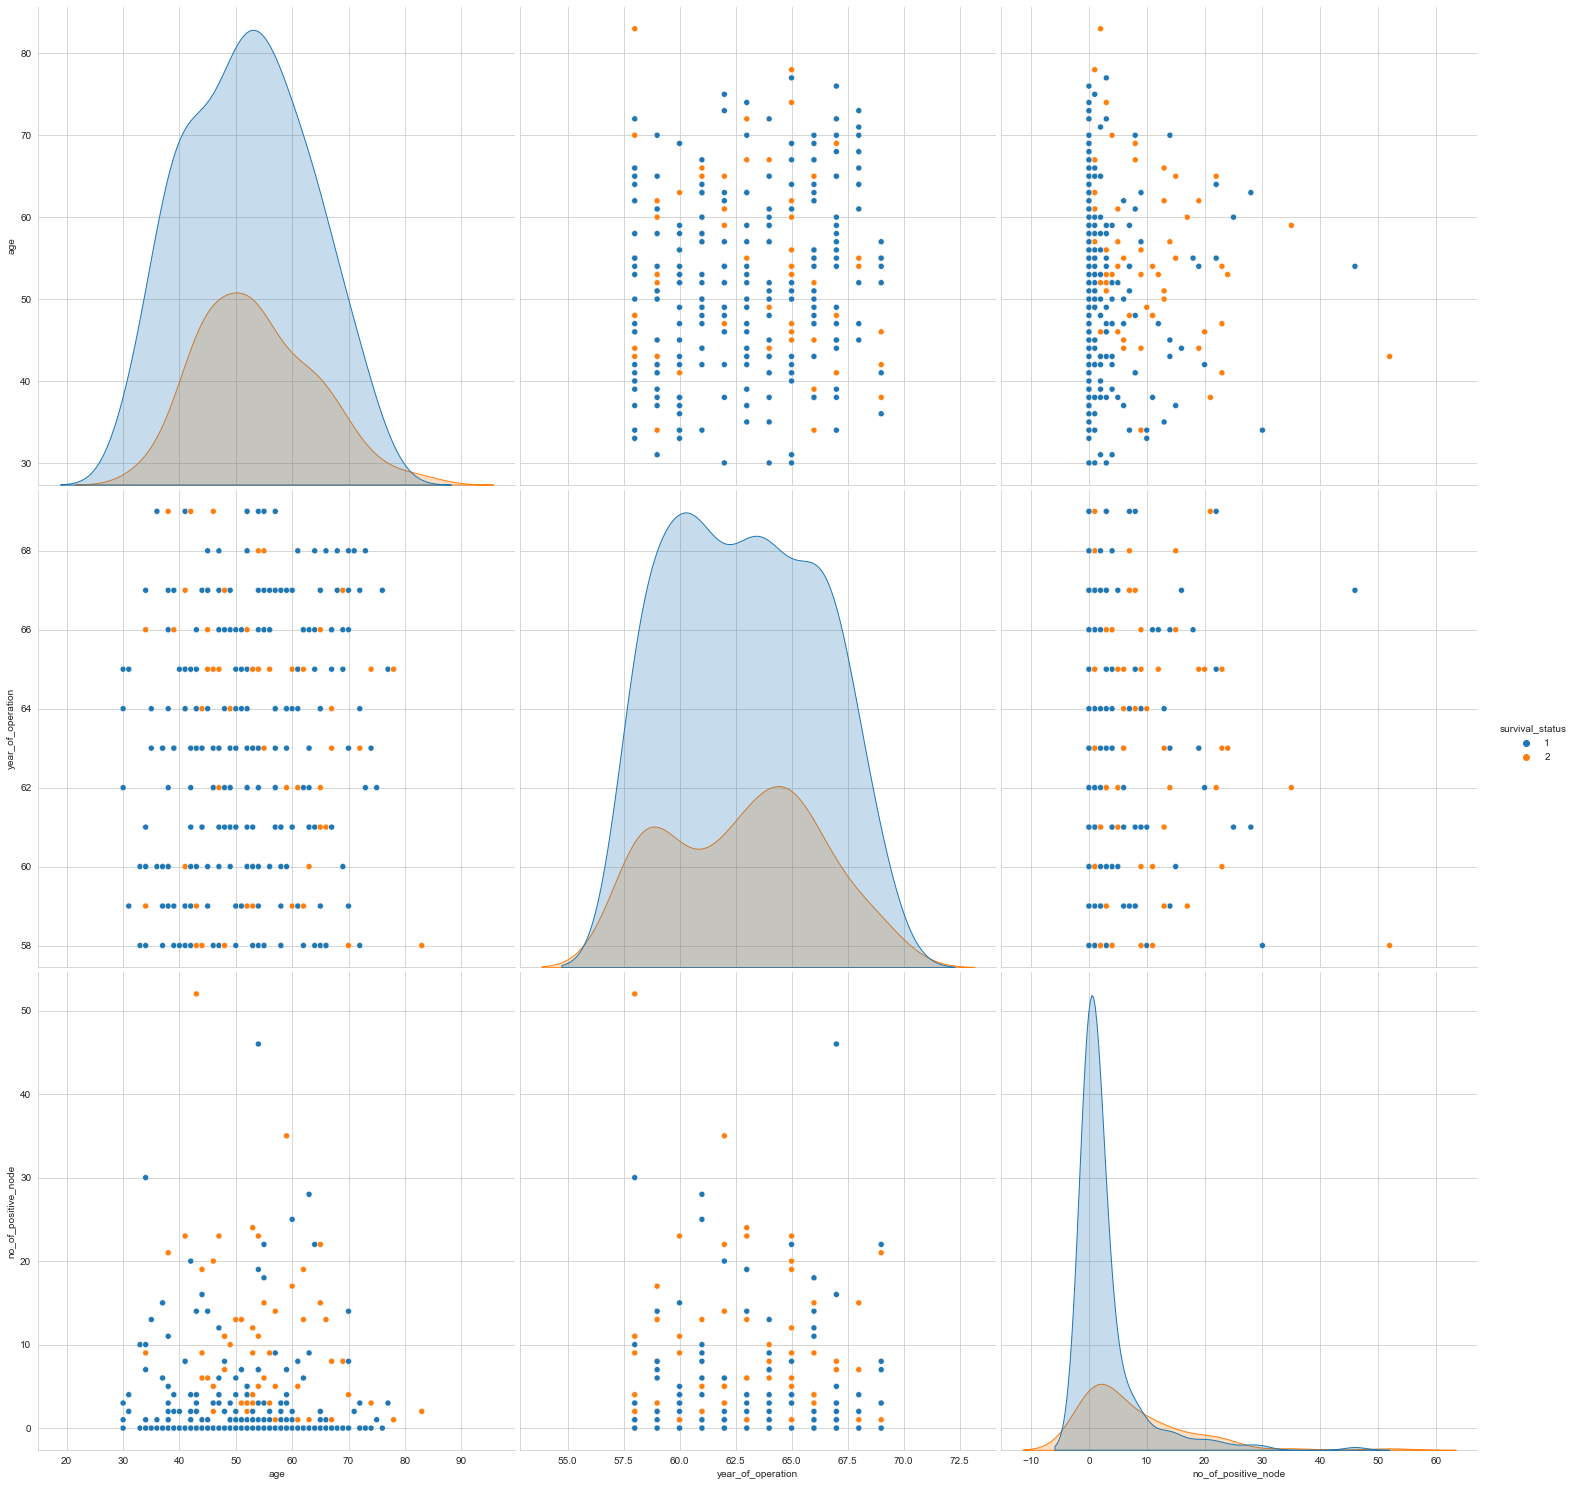

In [189]:
#PAIR PLOT
sns.set_style('whitegrid')
sns.pairplot(df,hue='survival_status',palette='tab10',height=7)
plt.show()


### OBSERVATION
- From the Pairplot also we can see that using **'no of positive nodes' vs 'age'** graph we can **somewhat seperate both classes better than other graphs**.
- So, **THE NUMBER OF POSITIVE AXILLARY NODES** is the most useful features.

# FINAL OBSERVATIONS FROM PDF AND CDF

[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


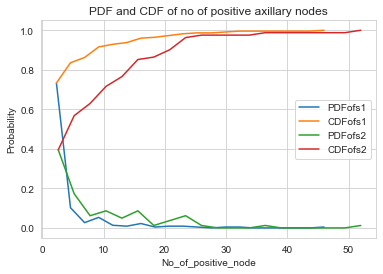

In [195]:
#PDF AND CDF
counts,bin_edge=np.histogram(s1['no_of_positive_node'],bins=20,density=True)
pdf=counts/sum(counts)
print(bin_edge)
cdf=np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf, label='PDFofs1')
b=plt.plot(bin_edge[1:],cdf, label='CDFofs1')

counts,bin_edge=np.histogram(s2['no_of_positive_node'],bins=20,density=True)
pdf=counts/sum(counts)
print(bin_edge)
cdf=np.cumsum(pdf)
c=plt.plot(bin_edge[1:],pdf,label='PDFofs2')
d=plt.plot(bin_edge[1:],cdf,label='CDFofs2')


plt.legend()
plt.title('PDF and CDF of no of positive axillary nodes')
plt.xlabel('No_of_positive_node')
plt.ylabel('Probability')
plt.show()

### OBSERVATION
- When the number of positive nodes are **less than or equal to 4**, we are getting the probability of surviving for mininum 5 years or more, after surgery, is **82%**.
- This can be **18% inacurate** due to overlapping of class 1 and 2.

#### BRIEF
- We were given **unbalanced** Haberman dataset with **306 datapoints and 4 features**.
- First we plot the data on 1D Histogram plot. From there we can see no of positive nodes had **lesser overlap** than others features.
- So we plotted **box plot** and **violin plot** with no of positive nodes.
- Then we plotted **scattered plot** with various combination of features and found out **number of Positive node** plot has better seperable scatted data than other plots.
- we verified those statement with **pairplot** also. So, **THE NUMBER OF POSITIVE AXILLARY NODES** is the most useful features.
- Finally we drew **PDF and CDF** of histogram of number of positive nodes feature to get better numerical insights on probability of survival status classes.

